In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import  recall_score, precision_score, accuracy_score, roc_curve
import graphviz

In [2]:
trainData = np.load('fin_t2_train.npy')
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = np.load('fin_t2_test.npy')
testLabels = open('finalTestLabels.labels', 'r').readlines()

In [3]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])

100%|██████████| 20000/20000 [00:00<00:00, 2152139.16it/s]


In [4]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))

In [5]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 17%|█▋        | 1/6 [05:16<26

Classification report for case:  50
              precision    recall  f1-score   support

           1       0.20      0.00      0.00      2022
           2       0.68      0.06      0.12      1955
           3       0.35      0.01      0.01      1099
           4       0.63      0.14      0.23      1246
           5       0.17      0.00      0.00       786
           6       0.45      0.04      0.07       809
           7       0.39      0.05      0.09       928
           8       0.38      0.04      0.07       669
           9       0.00      0.00      0.00       569
          10       0.20      0.00      0.00       595
          11       0.58      0.29      0.38       696
          12       0.41      0.24      0.30       546
          13       0.37      0.01      0.03       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.22      0.02      0.04       492
          17       0.61      0.65      0.63  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 33%|███▎      | 2/6 [18:41<40:14, 603.58s/it]

Classification report for case:  150
              precision    recall  f1-score   support

           1       0.31      0.00      0.01      2022
           2       0.36      0.15      0.21      1955
           3       0.33      0.01      0.01      1099
           4       0.50      0.21      0.30      1246
           5       0.12      0.00      0.01       786
           6       0.45      0.05      0.09       809
           7       0.42      0.07      0.12       928
           8       0.33      0.04      0.07       669
           9       0.19      0.01      0.02       569
          10       0.08      0.01      0.01       595
          11       0.54      0.30      0.39       696
          12       0.30      0.41      0.35       546
          13       0.37      0.02      0.04       492
          14       0.00      0.00      0.00       536
          15       0.20      0.06      0.09       498
          16       0.21      0.01      0.03       492
          17       0.54      0.68      0.60 

 50%|█████     | 3/6 [34:39<38:17, 765.81s/it]

Classification report for case:  250
              precision    recall  f1-score   support

           1       0.23      0.02      0.04      2022
           2       0.31      0.19      0.24      1955
           3       0.22      0.01      0.01      1099
           4       0.46      0.22      0.30      1246
           5       0.09      0.01      0.01       786
           6       0.41      0.05      0.09       809
           7       0.37      0.08      0.13       928
           8       0.33      0.04      0.07       669
           9       0.15      0.01      0.02       569
          10       0.10      0.01      0.02       595
          11       0.54      0.30      0.39       696
          12       0.29      0.41      0.34       546
          13       0.33      0.02      0.04       492
          14       0.12      0.00      0.00       536
          15       0.20      0.06      0.09       498
          16       0.23      0.01      0.03       492
          17       0.56      0.61      0.58 

 67%|██████▋   | 4/6 [56:42<32:51, 985.56s/it]

Classification report for case:  350
              precision    recall  f1-score   support

           1       0.23      0.03      0.05      2022
           2       0.29      0.20      0.24      1955
           3       0.20      0.01      0.01      1099
           4       0.45      0.23      0.30      1246
           5       0.08      0.01      0.01       786
           6       0.39      0.05      0.09       809
           7       0.35      0.08      0.13       928
           8       0.32      0.04      0.07       669
           9       0.19      0.01      0.03       569
          10       0.07      0.01      0.01       595
          11       0.55      0.30      0.39       696
          12       0.27      0.41      0.33       546
          13       0.31      0.02      0.04       492
          14       0.10      0.00      0.00       536
          15       0.21      0.06      0.10       498
          16       0.23      0.01      0.03       492
          17       0.43      0.62      0.51 

 83%|████████▎ | 5/6 [1:20:23<19:02, 1142.54s/it]

Classification report for case:  450
              precision    recall  f1-score   support

           1       0.23      0.02      0.04      2022
           2       0.30      0.19      0.24      1955
           3       0.19      0.01      0.01      1099
           4       0.45      0.22      0.29      1246
           5       0.07      0.01      0.01       786
           6       0.37      0.05      0.09       809
           7       0.35      0.08      0.13       928
           8       0.31      0.04      0.07       669
           9       0.20      0.01      0.03       569
          10       0.07      0.01      0.01       595
          11       0.55      0.29      0.38       696
          12       0.27      0.41      0.33       546
          13       0.31      0.02      0.04       492
          14       0.08      0.00      0.00       536
          15       0.17      0.06      0.09       498
          16       0.19      0.01      0.03       492
          17       0.27      0.54      0.36 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 6/6 [1:49:18<00:00, 1093.07s/it]

Classification report for case:  550
              precision    recall  f1-score   support

           1       0.17      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.10      0.13      0.11       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.00      0.00      0.00       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.17      0.69      0.27 

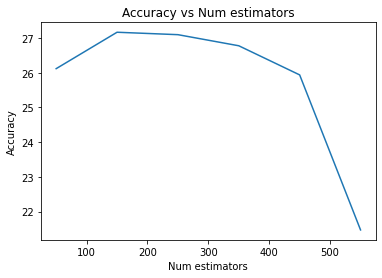

In [7]:
accuracy = []
predVal = []
itr= [50, 150, 250, 350, 450, 550]
for i in tqdm(range(len(itr))):
    clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    predVal.append(itr[i])


plt.plot(predVal, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num estimators')
plt.show()

In [8]:
print("Accuracy: ", accuracy)
print("predVal ",predVal)

Accuracy:  [26.12, 27.17, 27.1, 26.78, 25.94, 21.47]
predVal  [50, 150, 250, 350, 450, 550]
